## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ 
  - worst daily deaths by country evaluating last 7 days
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [16]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,United Kingdom,France,Italy,Spain,Belgium,Germany,Sweden,Brazil,Mexico,Netherlands,Turkey,Iran,Canada,Canada,Russia
4/20/20,1433,449,547,454,399,145,276,40,125,36,67,123,91,119,33,44
4/21/20,2350,828,531,534,430,170,171,185,154,26,165,119,88,105,70,51
4/22/20,2139,763,544,437,435,264,246,172,165,145,138,117,94,90,68,57


worst daily deaths by country evaluating last 7 days:


Country/Region
US                2560.555556
United Kingdom     752.333333
France             708.111111
Italy              513.333333
Spain              440.111111
Belgium            262.111111
Germany            231.666667
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 47.6 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 59.0 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 56.0 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 25.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 48.8 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 67 kB 9.3 MB/s  eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1884      0 --:--:-- --:--:-- --:--:--  1884
100 61481  100 61481    0     0   243k      0 --:--:-- --:--:-- --:--:--  243k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
Country/Region,,,,,,,,,,,,,
US,18595,20471,22029,23538,25843,28338,32930,36787,38664,40661,42094,44444,46583
Italy,18849,19468,19899,20465,21067,21645,22170,22745,23227,23660,24114,24648,25085
Spain,16081,16606,17209,17756,18056,18708,19315,20002,20043,20453,20852,21282,21717
France,13197,13832,14393,14967,15729,17167,17920,18681,19323,19718,20265,20796,21340
United Kingdom,8958,9875,10612,11329,12107,12868,13729,14576,15464,16060,16509,17337,18100
Belgium,3019,3346,3600,3903,4157,4440,4857,5163,5453,5683,5828,5998,6262
Iran,4232,4357,4474,4585,4683,4777,4869,4958,5031,5118,5209,5297,5391
Germany,2767,2736,3022,3194,3294,3804,4052,4352,4459,4586,4862,5033,5279
China,3216,3219,3219,3221,3221,3222,3222,4512,4512,4512,4512,4512,4512


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
Country/Region,,,,,,,,,,,,
US,1876,1558,1509,2305,2495,4592,3857,1877,1997,1433,2350,2139
United Kingdom,917,737,717,778,761,861,847,888,596,449,828,763
France,635,561,574,762,1438,753,761,642,395,547,531,544
Italy,619,431,566,602,578,525,575,482,433,454,534,437
Spain,525,603,547,300,652,607,687,41,410,399,430,435
Belgium,327,254,303,254,283,417,306,290,230,145,170,264
Germany,-31,286,172,100,510,248,300,107,127,276,171,246
Sweden,17,12,20,114,170,130,67,111,29,40,185,172
Brazil,67,99,105,204,204,188,217,213,108,125,154,165


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
1876,1558,1509,2305,2495,4592,3857,1877,1997,1433,2350,2139"
data-datasets="917,737,717,778,761,861,847,888,596,449,828,763"
data-datasets="635,561,574,762,1438,753,761,642,395,547,531,544"
data-datasets="619,431,566,602,578,525,575,482,433,454,534,437"
data-datasets="525,603,547,300,652,607,687,41,410,399,430,435"
data-datasets="327,254,303,254,283,417,306,290,230,145,170,264"
data-datasets="-31,286,172,100,510,248,300,107,127,276,171,246"
data-datasets="17,12,20,114,170,130,67,111,29,40,185,172"
data-datasets="67,99,105,204,204,188,217,213,108,125,154,165"
data-datasets="39,40,23,36,74,43,37,60,104,36,26,145"
data-datasets="132,94,86,122,189,181,144,142,83,67,165,138"
data-datasets="95,97,98,107,115,125,126,121,127,123,119,117"
data-datasets="125,117,111,98,94,92,89,73,87,91,88,94"
data-datasets="48,39,32,75,52,143,58,0,132,119,105,90"
data-datasets="31,21,17,43,51,105,34,40,27,33,70,68"
data-datasets="

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Algeria,Argentina,Austria,Bangladesh,Belgium,Brazil,Canada,Canada,Chile,China,...,Russia,Saudi Arabia,Serbia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US
4/19/20,8,3,9,7,230,108,27,132,7,0,...,48,5,5,410,29,25,127,8,596,1997
4/20/20,9,4,18,10,145,125,33,119,6,0,...,44,6,3,399,40,36,123,10,449,1433
4/21/20,8,11,21,9,170,154,70,105,8,0,...,51,6,0,430,185,49,119,10,828,2350
4/22/20,10,5,19,10,264,165,68,90,13,0,...,57,5,0,435,172,31,117,13,763,2139


In [10]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                2657.285714
United Kingdom     747.142857
France             723.857143
Italy              511.571429
Spain              460.857143
Belgium            263.000000
Germany            248.428571
dtype: float64

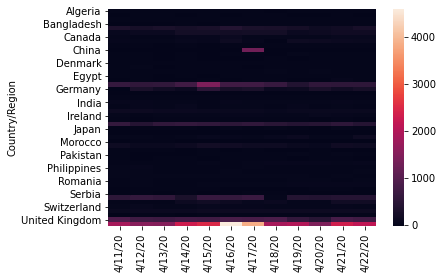

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

50 15.916666666666666


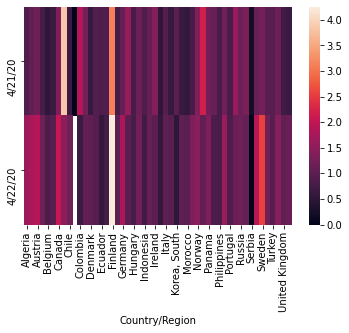

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/22/20
Country/Region,
Mexico,2.556090
Sweden,1.801905
Chile,1.643678
Russia,1.540541
Canada,1.469548
Peru,1.449857
Ukraine,1.415842
Dominican Republic,1.320000
Poland,1.261468


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 8.4 MB/s eta 0:00:01     |███▋                            | 808 kB 8.4 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=e945ca47034b4ddaa6768dc26d590ef9710f2df6f5432fee47642736a0722d63
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
